# Column Generation Real


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from exputils.extent.cg import calculate_extent_CG
from exputils.state.random_ket import make_random_quantum_state

In [3]:
sns.set_theme("paper")
color_table = plt.rcParams["axes.prop_cycle"].by_key()["color"]
rc = {
    "mathtext.fontset": "stix",
    "font.size": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage{amsmath}",
}
plt.rcParams.update(rc)


def visualize_CG(n, kind):
    log_file_name = f"../data/CG_real/{kind}_{n}_data.txt"

    extends = []
    max_values = []
    with open(log_file_name, mode="r") as f:
        lines = f.readlines()
        for line in lines:
            extend, max_value = map(float, line.split())
            extends.append(extend)
            max_values.append(max_value)

    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(x=list(range(len(extends))), y=extends, ax=ax1, marker="o")
    ax1.set_xlabel("$k$", fontsize=30)
    ax1.set_ylabel(r"$\hat{\xi}_k(\psi)$", fontsize=30)
    ax1.set_xticks(list(range(len(extends))))
    sns.lineplot(x=list(range(len(max_values))), y=max_values, ax=ax2, marker="o")
    ax2.set_xlabel("$k$", fontsize=30)
    ax2.set_ylabel("$\max \\lvert a_j^\dagger y_k \\rvert$", fontsize=30)
    ax2.set_xticks(list(range(len(max_values))))

    ax1.set_title("(a)", fontsize=25, x=-0.07, y=1.05)
    ax2.set_title("(b)", fontsize=25, x=-0.07, y=1.05)

    plt.tight_layout()
    plt.savefig(f"../image/CG_real_{n}.pdf", bbox_inches="tight")
    plt.show()

In [3]:
import time

n = 10
seed = 0
kind = "real"
print(f"{n=}")

psi = make_random_quantum_state(kind, n, seed)
assert np.isclose(np.linalg.norm(psi), 1.0)

t0 = time.perf_counter()
stabilizer_extent, extends, max_values, _ = calculate_extent_CG(n, psi)
t1 = time.perf_counter()
print(f"{stabilizer_extent=} {t1-t0=}")

with open(f"../data/CG_real/{kind}_{n}_data.txt", mode="w") as f:
    for i in range(len(extends)):
        print(f"{extends[i]} {max_values[i]}", file=f)

with open(f"../data/CG_real/{kind}_{n}_time.txt", mode="w") as f:
    print(t1 - t0, file=f)

n=10
CG: n=10, method='mosek'
start: calculate dots
[k|progress|range]:  1 | 2.09613e+06/8.78768e+19 | [0.03644, 0.07630] | 46[ms]
[k|progress|range]:  2 | 1.42956e+09/8.78768e+19 | [0.09112, 0.10708] | 334[ms]
[k|progress|range]:  3 | 4.17433e+11/8.78768e+19 | [0.12321, 0.14496] | 4700[ms]
[k|progress|range]:  4 | 5.67721e+13/8.78768e+19 | [0.15241, 0.18698] | 28817[ms]
[k|progress|range]:  5 | 3.72164e+15/8.78768e+19 | [0.17581, 0.21948] | 100172[ms]
[k|progress|range]:  6 | 1.19136e+17/8.78768e+19 | [0.19407, 0.23896] | 449880[ms]
[k|progress|range]:  7 | 1.86398e+18/8.78768e+19 | [0.20625, 0.24883] | 1694084[ms]
[k|progress|range]:  8 | 1.41258e+19/8.78768e+19 | [0.21405, 0.26380] | 4218834[ms]
[k|progress|range]:  9 | 5.09833e+19/8.78768e+19 | [0.21654, 0.26380] | 6818502[ms]
[k|progress|range]: 10 | 8.78768e+19/8.78768e+19 | [0.21937, 0.26380] | 7946234[ms]
 calculation time : 7946238[ms]
iteration: 1 / 30, Amat.shape = (1024, 100000)
start: solve SOCP
stabilizer_extent=17.974317

7.447522429873546


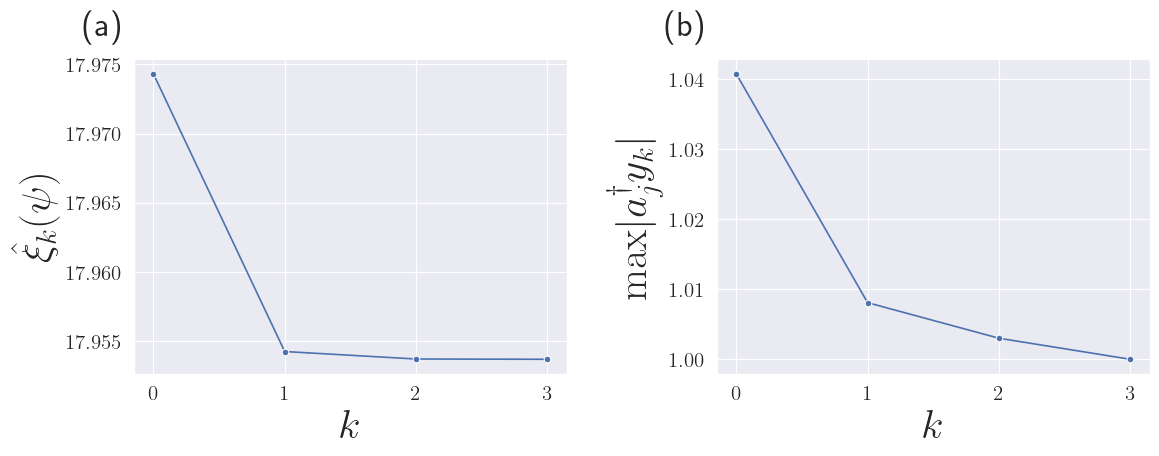

In [4]:
kind = "real"
n = 10

with open(f"../data/CG_real/{kind}_{n}_time.txt") as f:
    print(f"{float(f.read())/3600}")

visualize_CG(n, "real")